### Hierarchical Clustering

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
econ = pd.read_pickle('econ.pkl')
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 1 to 570
Data columns (total 49 columns):
FIPS              570 non-null object
city_town         570 non-null object
p_in_lab          570 non-null float64
p_unemployed      570 non-null float64
p_fem_labforce    570 non-null float64
p_fem_employed    570 non-null float64
p_ch6_paremp      570 non-null float64
p_com_car         570 non-null float64
p_com_carpool     570 non-null float64
p_com_transit     570 non-null float64
p_com_walk        570 non-null float64
p_com_other       570 non-null float64
p_com_home        570 non-null float64
mean_com_time     570 non-null float64
p_occ_bus         570 non-null float64
p_occ_serv        570 non-null float64
p_occ_sales       570 non-null float64
p_occ_const       570 non-null float64
p_occ_trans       570 non-null float64
p_ind_agri        570 non-null float64
p_ind_const       570 non-null float64
p_ind_manu        570 non-null float64
p_ind_whsl        570 non-null float64


In [3]:
s =pd.DataFrame([x.split(sep=',') for x in econ['city_town']])
s.columns = ['town','county','state']
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 3 columns):
town      570 non-null object
county    570 non-null object
state     570 non-null object
dtypes: object(3)
memory usage: 13.4+ KB


In [4]:
X = econ.loc[:,'p_in_lab':'p_peop_pov']
X=X.set_index(s['town'])
X.ix[520]

p_in_lab              68.1
p_unemployed           4.6
p_fem_labforce        59.7
p_fem_employed        55.8
p_ch6_paremp          44.3
p_com_car             81.8
p_com_carpool          6.8
p_com_transit          3.0
p_com_walk             0.3
p_com_other            1.0
p_com_home             7.2
mean_com_time         40.0
p_occ_bus             49.6
p_occ_serv            13.6
p_occ_sales           25.9
p_occ_const            5.8
p_occ_trans            5.1
p_ind_agri             0.1
p_ind_const            5.3
p_ind_manu            10.9
p_ind_whsl             4.9
p_ind_retl             8.2
p_ind_warehs           4.9
p_ind_info             2.4
p_ind_fire             9.8
p_ind_prof            14.6
p_ind_edu             21.9
p_ind_arts             8.9
p_ind_othserv          4.1
p_ind_pubadmin         4.2
p_class_wage          78.6
p_class_govt          14.3
p_class_self           7.1
p_class_unpaid         0.0
p_less10               1.6
p_10to15               1.8
p_15to25               3.9
p

In [5]:
X = X[X['p_in_lab'] != 0]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, Absecon city to White township
Data columns (total 47 columns):
p_in_lab          565 non-null float64
p_unemployed      565 non-null float64
p_fem_labforce    565 non-null float64
p_fem_employed    565 non-null float64
p_ch6_paremp      565 non-null float64
p_com_car         565 non-null float64
p_com_carpool     565 non-null float64
p_com_transit     565 non-null float64
p_com_walk        565 non-null float64
p_com_other       565 non-null float64
p_com_home        565 non-null float64
mean_com_time     565 non-null float64
p_occ_bus         565 non-null float64
p_occ_serv        565 non-null float64
p_occ_sales       565 non-null float64
p_occ_const       565 non-null float64
p_occ_trans       565 non-null float64
p_ind_agri        565 non-null float64
p_ind_const       565 non-null float64
p_ind_manu        565 non-null float64
p_ind_whsl        565 non-null float64
p_ind_retl        565 non-null float64
p_ind_warehs      56

In [6]:
X_scaled = preprocessing.scale(X)

X_scaled[520:521,:]    

array([[ -2.8927 ,  -2.50426,  -3.76818,  -3.27184,  -4.21127,  -7.10293,
         -2.0429 ,  -0.87277,  -0.77254,  -0.72   ,  18.73738,  -5.16788,
          0.58689,  -2.41473,   5.41783,  -2.03132,  -1.71803,  -0.51818,
         -2.14024,  -2.43758,  -1.95482,  -3.24955,  -1.79673,  -1.75787,
         -1.9293 ,  -2.26129,  -4.62552,  -1.62669,  -2.18404,  18.88919,
        -12.41851,  13.74099,  -2.02156,  -0.44357,  -1.24999,  -1.34854,
         14.09868,   6.226  ,  -2.56042,  -3.49265,  -3.51826,  -3.31898,
         -2.03025,  -1.00598,  -2.22539,  -1.90385,  -1.23133]])

In [7]:
Z = linkage(X_scaled, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c
coph_dists
c

0.36890877685115542

In [8]:
Z[:10]

array([[ 168.     ,  232.     ,    1.91784,    2.     ],
       [ 299.     ,  300.     ,    2.06533,    2.     ],
       [ 419.     ,  444.     ,    2.13023,    2.     ],
       [ 408.     ,  409.     ,    2.15699,    2.     ],
       [ 105.     ,  116.     ,    2.17416,    2.     ],
       [ 405.     ,  481.     ,    2.22065,    2.     ],
       [ 146.     ,  540.     ,    2.2246 ,    2.     ],
       [ 141.     ,  569.     ,    2.26551,    3.     ],
       [ 312.     ,  484.     ,    2.2658 ,    2.     ],
       [ 310.     ,  314.     ,    2.28491,    2.     ]])

In [9]:
Z[-10:]

array([[ 1112.     ,  1117.     ,    24.58043,   108.     ],
       [ 1105.     ,  1118.     ,    29.41453,    34.     ],
       [ 1114.     ,  1115.     ,    30.2487 ,   252.     ],
       [ 1113.     ,  1119.     ,    31.40999,   186.     ],
       [ 1116.     ,  1121.     ,    39.04323,   273.     ],
       [ 1103.     ,  1108.     ,    39.06628,    71.     ],
       [ 1120.     ,  1122.     ,    48.61562,   220.     ],
       [  520.     ,  1125.     ,    56.61933,   221.     ],
       [ 1123.     ,  1124.     ,    57.04031,   344.     ],
       [ 1126.     ,  1127.     ,    89.63789,   565.     ]])

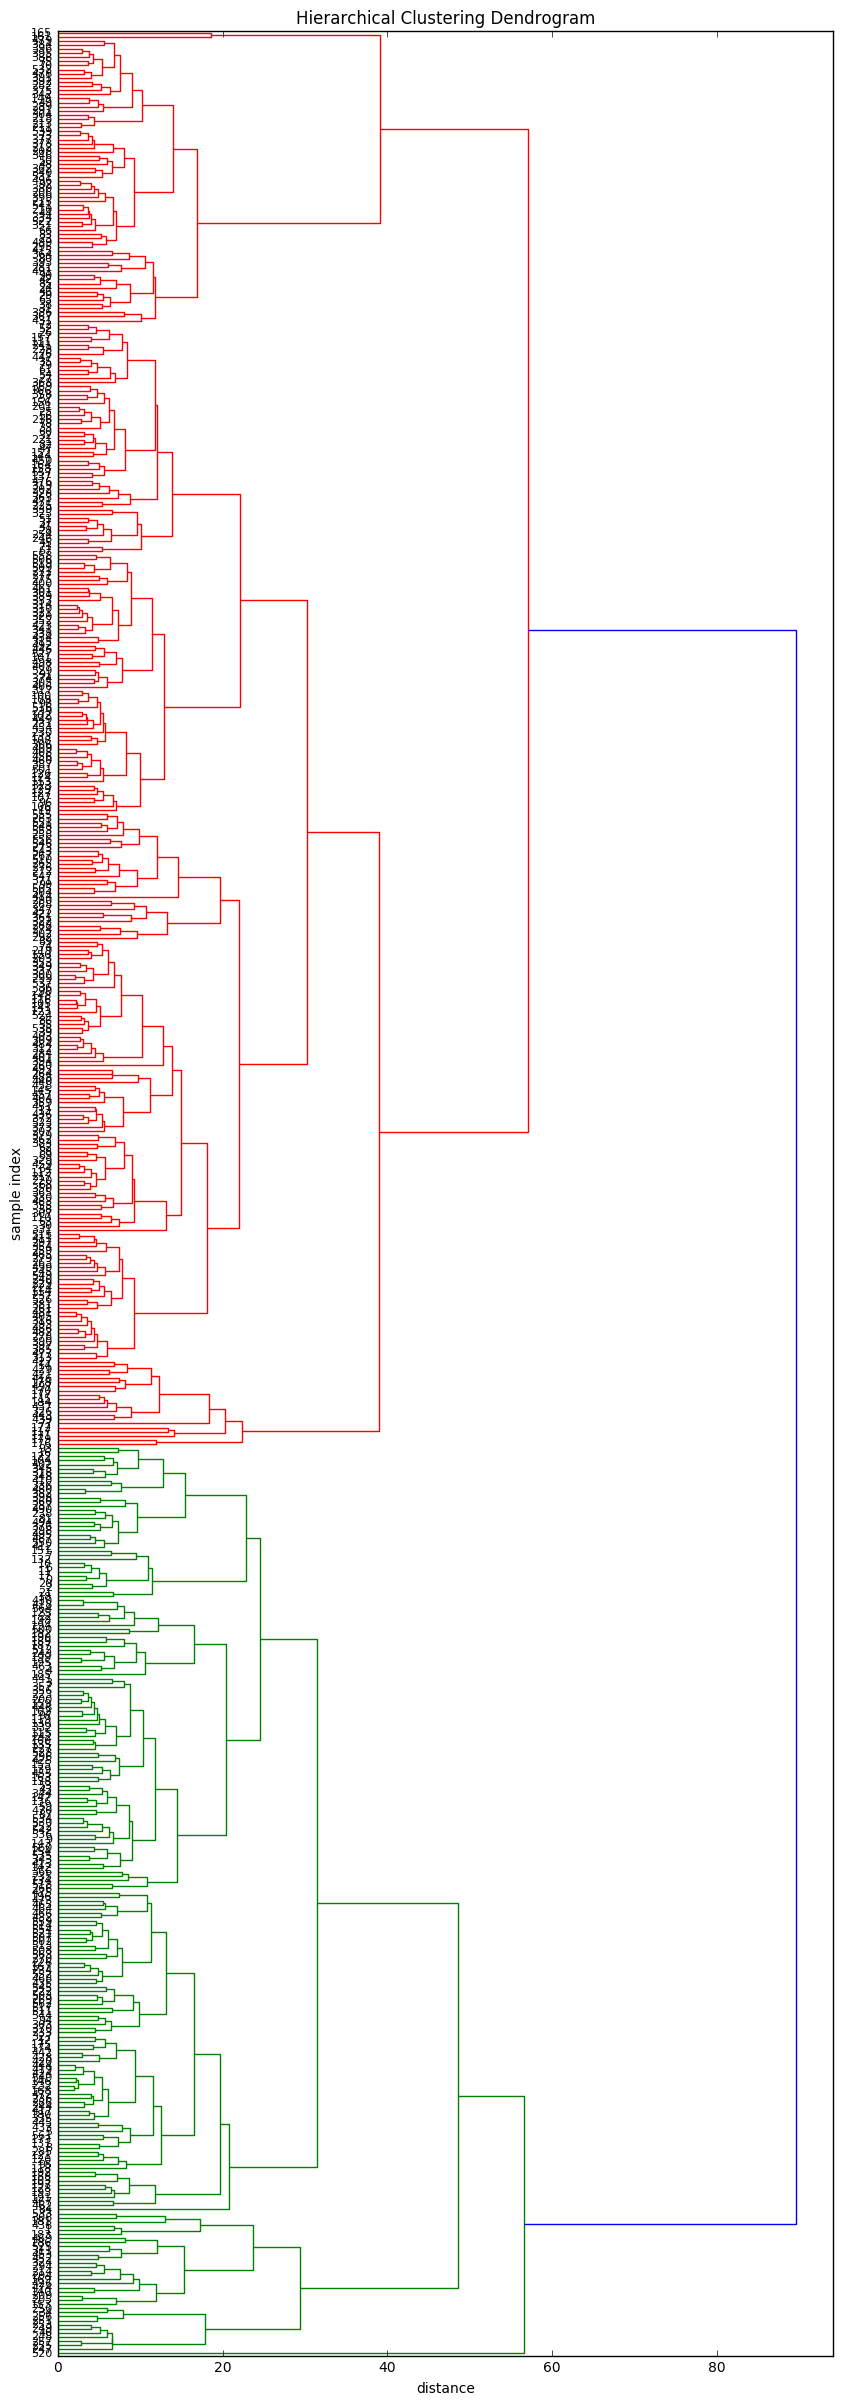

In [10]:
# calculate full dendrogram
plt.figure(figsize=(10, 30))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')
dendrogram(
    Z,
    orientation='right',
#    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [11]:
Z[-10:,2]

array([ 24.58043,  29.41453,  30.2487 ,  31.40999,  39.04323,  39.06628,
        48.61562,  56.61933,  57.04031,  89.63789])

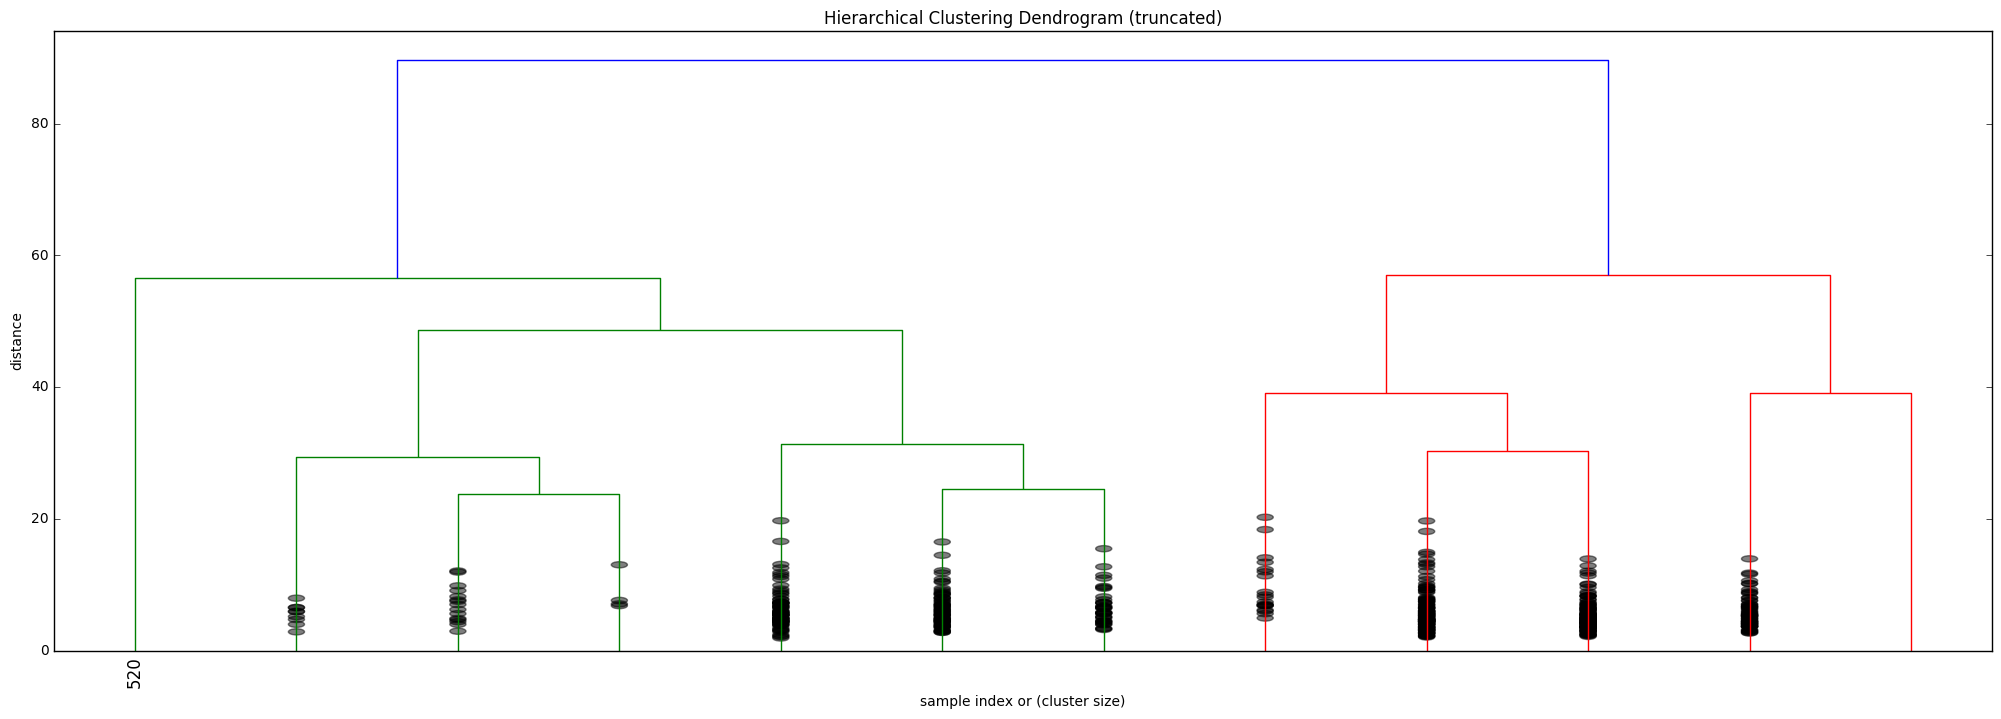

In [12]:
plt.figure(figsize=(25, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [13]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

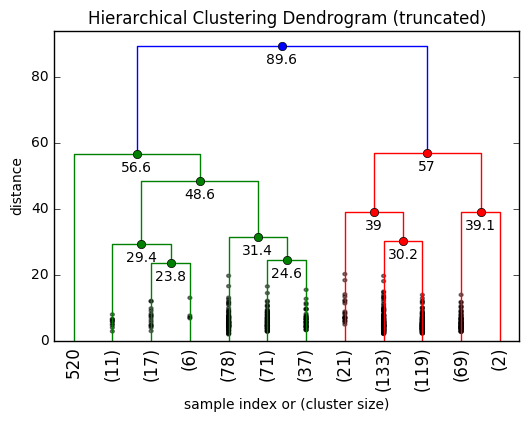

In [14]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

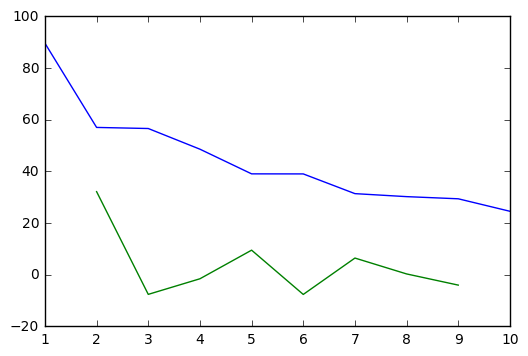

clusters: 2


In [15]:
## Elbow Method

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [ ]:
from collections import defaultdict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters):
    cluster_dict[c].append(i)
print(cluster_dict)